In [ ]:
import os

# Create project structure inside Colab
os.makedirs("employee-productivity-stress-analysis/src", exist_ok=True)
os.makedirs("employee-productivity-stress-analysis/dataset", exist_ok=True)

print("Project folders created in Colab")


Project folders created in Colab


In [ ]:
import numpy as np
import pandas as pd

# Number of employees
n = 30# total rows

# Generate synthetic data
np.random.seed(42)
hours_worked = np.random.normal(40, 6, n).astype(int)
hours_worked = np.clip(hours_worked, 25, 70)

tasks_completed = np.random.poisson(12, n)
overtime_hours = np.random.poisson(2, n)
leaves_taken = np.random.randint(0, 6, n)
job_satisfaction = np.random.randint(1, 6, n)

# Stress score rule
score = (
    0.5 * (hours_worked / 60.0) +
    0.6 * (overtime_hours / 20.0) +
    0.4 * ((5 - job_satisfaction) / 4.0) +
    0.3 * (leaves_taken / 5.0) +
    np.random.normal(0, 0.03, n)
)

# Stress labels
stress_level = np.where(score < 0.35, "Low",
                np.where(score < 0.60, "Medium", "High"))

# DataFrame
df = pd.DataFrame({
    "EmployeeID": np.arange(1, n + 1),
    "HoursWorked": hours_worked,
    "TasksCompleted": tasks_completed,
    "OvertimeHours": overtime_hours,
    "LeavesTaken": leaves_taken,
    "JobSatisfaction": job_satisfaction,
    "StressLevel": stress_level
})

# Save dataset inside Colab project folder
df.to_csv("employee-productivity-stress-analysis/dataset/employees.csv", index=False)

print("✅ Dataset saved to dataset/employees.csv")

# Show first 10 rows
df.head(30)


✅ Dataset saved to dataset/employees.csv


,EmployeeID,HoursWorked,TasksCompleted,OvertimeHours,LeavesTaken,JobSatisfaction,StressLevel
0,1,42,14,3,3,3,High
1,2,39,7,4,5,5,High
2,3,43,9,0,3,3,High
3,4,49,10,1,5,3,High
4,5,38,12,2,2,3,High
5,6,38,6,2,5,2,High
6,7,49,4,0,0,5,Medium
7,8,44,11,2,2,1,High
8,9,37,16,2,0,4,Medium
9,10,43,10,3,4,1,High


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       30 non-null     int64 
 1   HoursWorked      30 non-null     int64 
 2   TasksCompleted   30 non-null     int64 
 3   OvertimeHours    30 non-null     int64 
 4   LeavesTaken      30 non-null     int64 
 5   JobSatisfaction  30 non-null     int64 
 6   StressLevel      30 non-null     object
dtypes: int64(6), object(1)
memory usage: 1.8+ KB
None

 Summary Statistics:
       EmployeeID  HoursWorked  TasksCompleted  OvertimeHours  LeavesTaken  \
count   30.000000    30.000000       30.000000      30.000000    30.000000   
mean    15.500000    38.366667       11.733333       1.933333     2.433333   
std      8.803408     5.391458        3.609693       1.337350     1.832340   
min      1.000000    28.000000        4.000000       0.000000     0.000000   
25%      8.

,EmployeeID,HoursWorked,TasksCompleted,OvertimeHours,LeavesTaken,JobSatisfaction,StressLevel
0,1,42,14,3,3,3,High
1,2,39,7,4,5,5,High
2,3,43,9,0,3,3,High
3,4,49,10,1,5,3,High
4,5,38,12,2,2,3,High
5,6,38,6,2,5,2,High
6,7,49,4,0,0,5,Medium
7,8,44,11,2,2,1,High
8,9,37,16,2,0,4,Medium
9,10,43,10,3,4,1,High


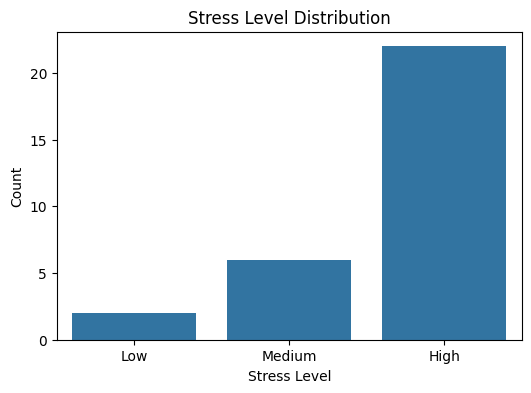

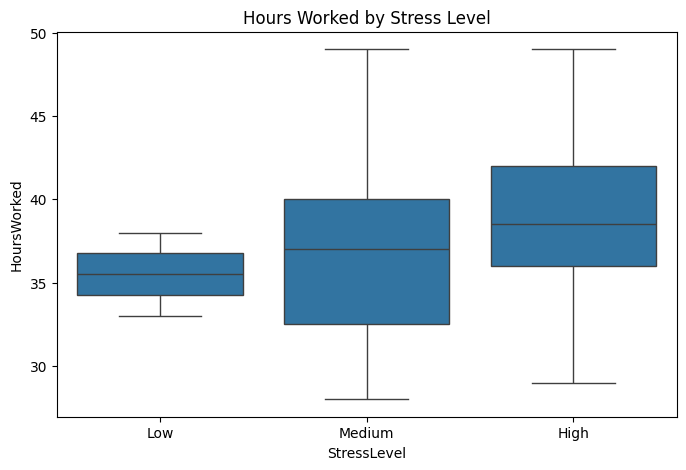

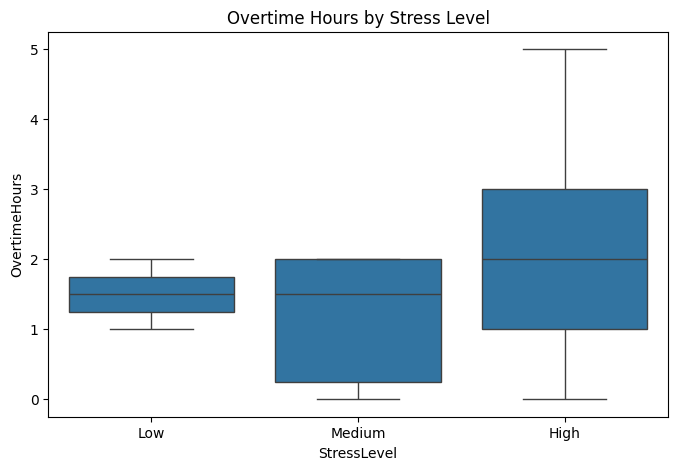

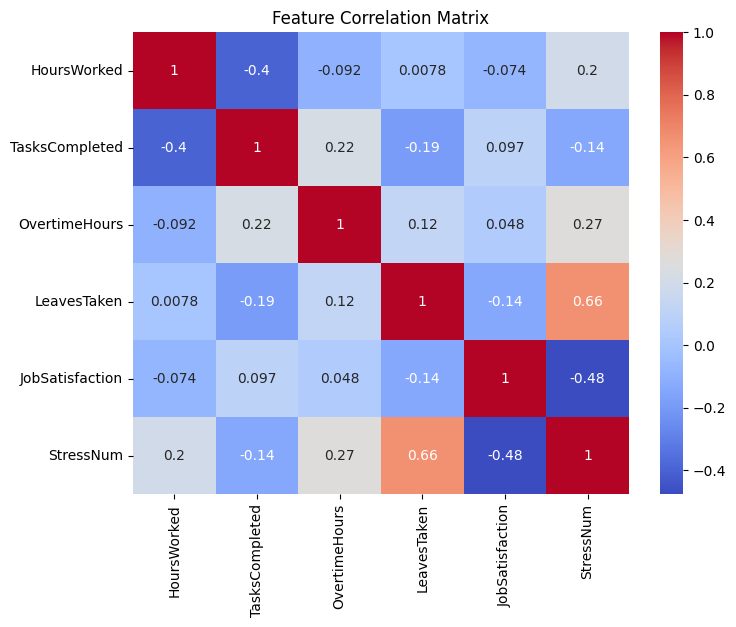

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("employee-productivity-stress-analysis/dataset/employees.csv")

# Display basic info
print(" Dataset Info:")
print(df.info())
print("\n Summary Statistics:")
print(df.describe())

# Show first 10 rows again
print("\n First 10 Rows:")
display(df.head(10))

# -----------------------------
# Target Distribution: StressLevel
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='StressLevel', data=df, order=['Low','Medium','High'])
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# -----------------------------
# Boxplot: HoursWorked vs StressLevel
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='StressLevel', y='HoursWorked', data=df, order=['Low','Medium','High'])
plt.title("Hours Worked by Stress Level")
plt.show()

# -----------------------------
# Boxplot: OvertimeHours vs StressLevel
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='StressLevel', y='OvertimeHours', data=df, order=['Low','Medium','High'])
plt.title("Overtime Hours by Stress Level")
plt.show()

# -----------------------------
# Correlation Heatmap
# -----------------------------
num = df.copy()
# Encode StressLevel numerically
num['StressNum'] = num['StressLevel'].map({'Low':0,'Medium':1,'High':2})
corr = num[['HoursWorked','TasksCompleted','OvertimeHours','LeavesTaken','JobSatisfaction','StressNum']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


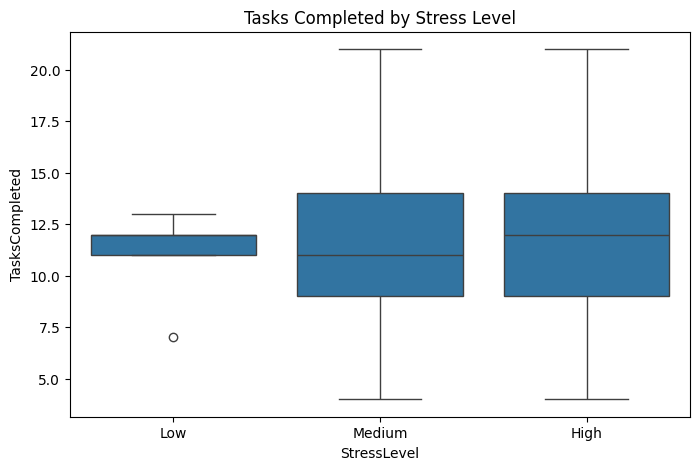

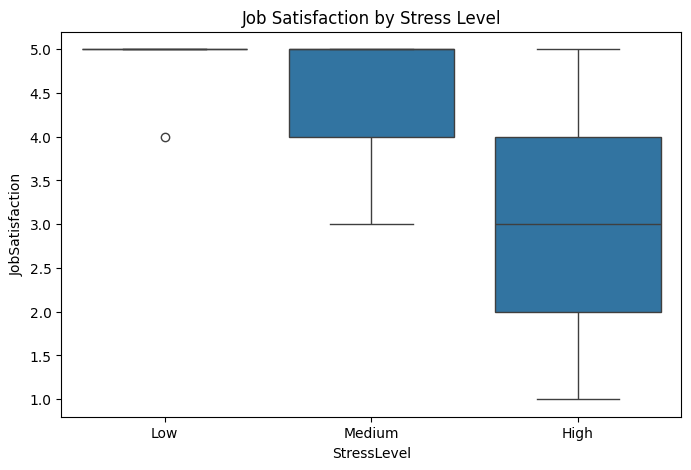

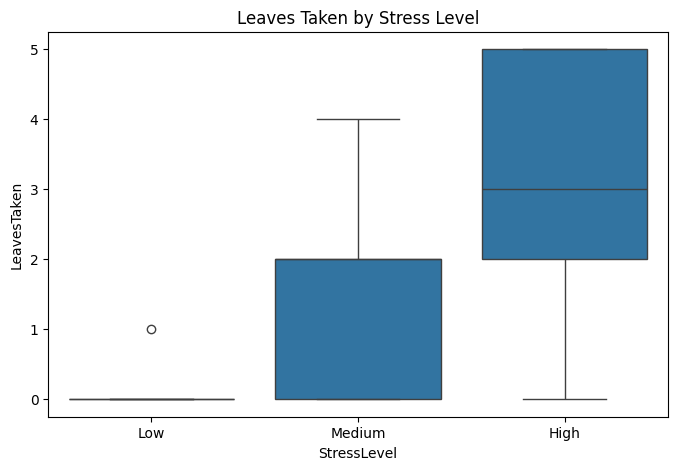

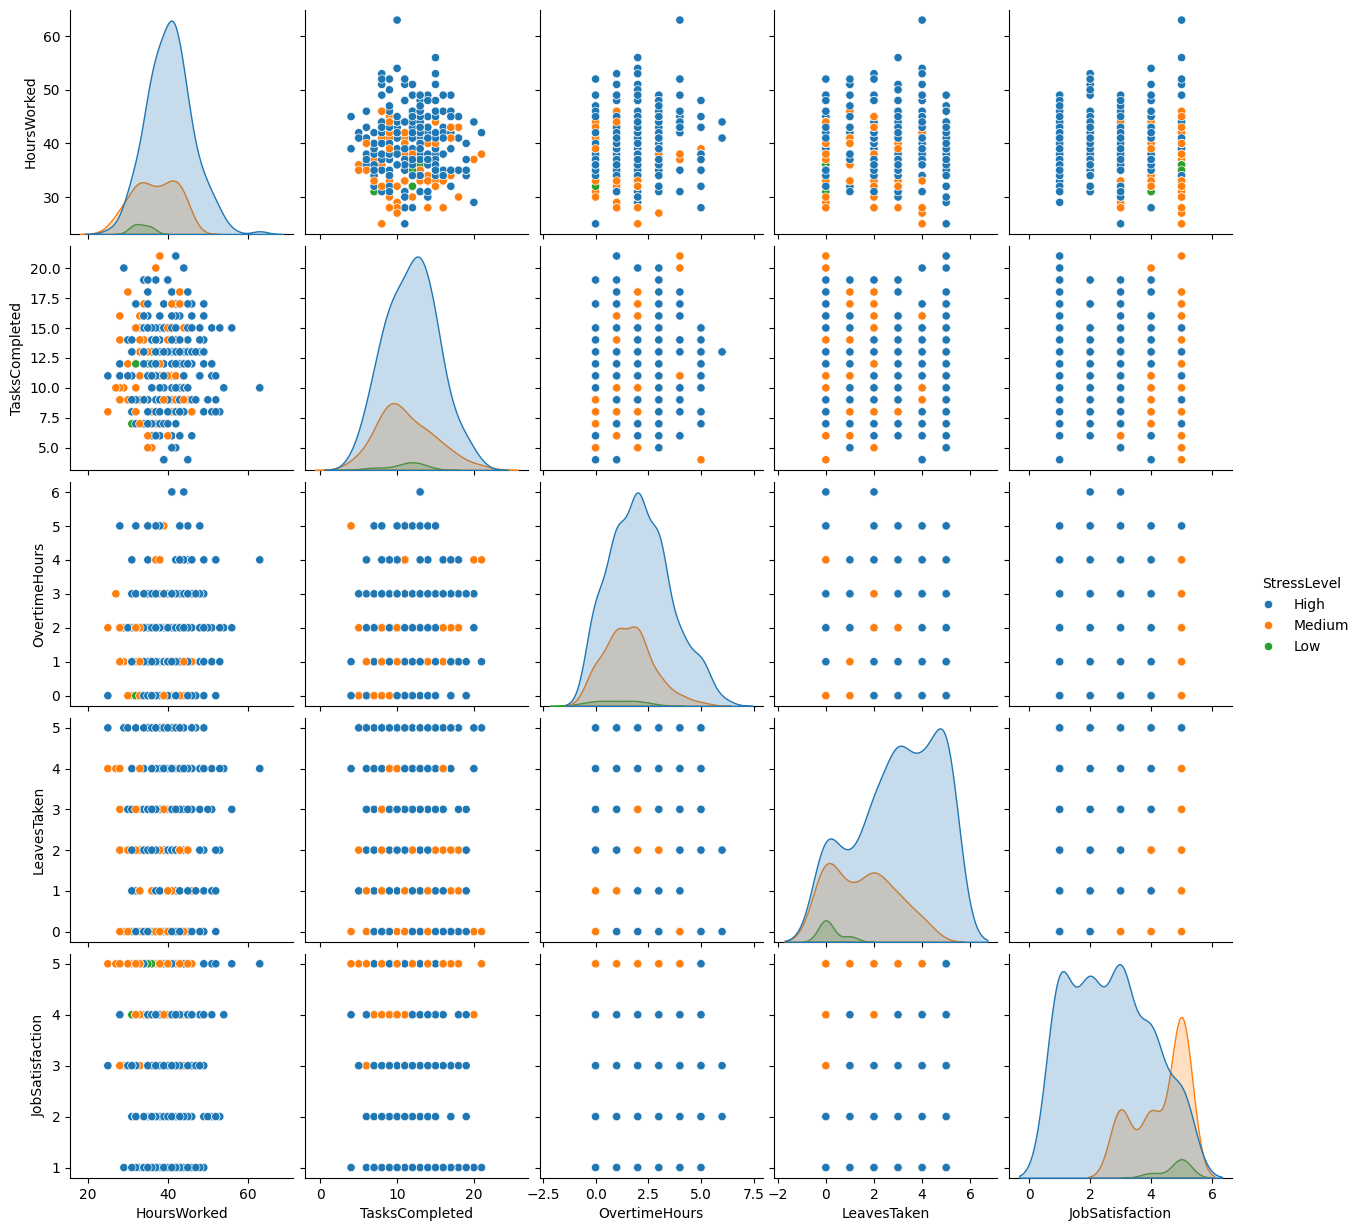

In [ ]:
# -----------------------------
# Boxplot: TasksCompleted vs StressLevel
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='StressLevel', y='TasksCompleted', data=df, order=['Low','Medium','High'])
plt.title("Tasks Completed by Stress Level")
plt.show()

# -----------------------------
# Boxplot: JobSatisfaction vs StressLevel
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='StressLevel', y='JobSatisfaction', data=df, order=['Low','Medium','High'])
plt.title("Job Satisfaction by Stress Level")
plt.show()

# -----------------------------
# Boxplot: LeavesTaken vs StressLevel
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='StressLevel', y='LeavesTaken', data=df, order=['Low','Medium','High'])
plt.title("Leaves Taken by Stress Level")
plt.show()

# -----------------------------
# Pairplot: Overview of all features by StressLevel
# -----------------------------
sns.pairplot(df, hue='StressLevel', vars=['HoursWorked','TasksCompleted','OvertimeHours','LeavesTaken','JobSatisfaction'], height=2.5)
plt.show()



---- Decision Tree ----
Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.89      0.91        45
         Low       0.50      1.00      0.67         1
      Medium       0.67      0.71      0.69        14

    accuracy                           0.85        60
   macro avg       0.70      0.87      0.76        60
weighted avg       0.86      0.85      0.85        60



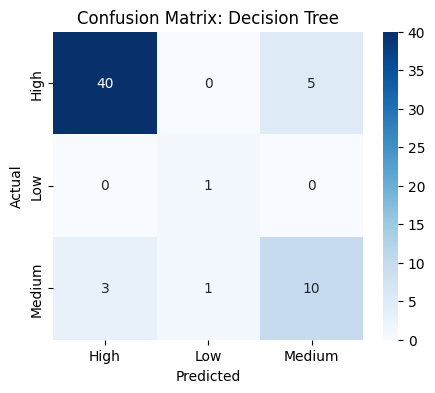


---- Naive Bayes ----
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

        High       0.94      1.00      0.97        45
         Low       0.50      1.00      0.67         1
      Medium       1.00      0.71      0.83        14

    accuracy                           0.93        60
   macro avg       0.81      0.90      0.82        60
weighted avg       0.94      0.93      0.93        60



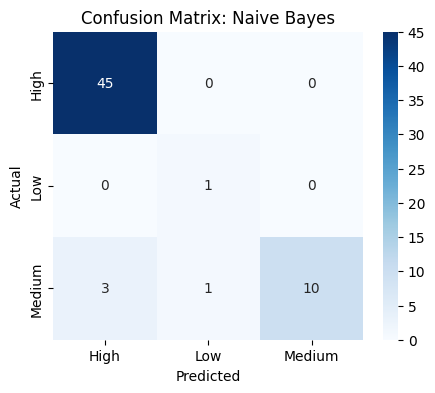

In [ ]:
# -----------------------------
# Machine Learning: Predict StressLevel
# -----------------------------
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
features = ['HoursWorked','TasksCompleted','OvertimeHours','LeavesTaken','JobSatisfaction']
X = df[features]
y = df['StressLevel']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# -----------------------------
# Train models
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

models = {'Decision Tree': dt, 'Naive Bayes': nb}

# Evaluate models
for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n---- {name} ----")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, preds, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


In [ ]:
# Choose model
model = dt  # or nb for Naive Bayes

# Input new employee data
new_employee = [45, 10, 3, 1, 4]

# Convert to DataFrame with same feature names
X_new = pd.DataFrame([new_employee], columns=features)

# Predict
pred_num = model.predict(X_new)
pred_label = le.inverse_transform(pred_num)

print("Predicted Stress Level:", pred_label[0])


Predicted Stress Level: High


In [ ]:
from google.colab import files
import shutil

# Project folders
project_root = "employee-productivity-stress-analysis"
dataset_folder = os.path.join(project_root, "dataset")
src_folder = os.path.join(project_root, "src")

# Make src folder if not exists
os.makedirs(src_folder, exist_ok=True)

# -----------------------------
# Save dataset (already done, but just to confirm)
df.to_csv(os.path.join(dataset_folder, "employees.csv"), index=False)

# -----------------------------
# Save src scripts locally
# Train model script
train_code = """\
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../dataset/employees.csv')

features = ['HoursWorked','TasksCompleted','OvertimeHours','LeavesTaken','JobSatisfaction']
X = df[features]
y = df['StressLevel']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Models
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

models = {'Decision Tree': dt, 'Naive Bayes': nb}

for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\\n---- {name} ----")
    print(f"Accuracy: {acc:.4f}")
    print("\\nClassification Report:")
    print(classification_report(y_test, preds, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
"""

with open(os.path.join(src_folder, "train_model.py"), "w") as f:
    f.write(train_code)

# Prediction script
predict_code = """\
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset to get feature names
df = pd.read_csv('../dataset/employees.csv')
features = ['HoursWorked','TasksCompleted','OvertimeHours','LeavesTaken','JobSatisfaction']

# Train simple Decision Tree for demonstration
X = df[features]
y = df['StressLevel']
le = LabelEncoder()
y_enc = le.fit_transform(y)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y_enc)

# Example input
new_employee = [45, 10, 3, 1, 4]
X_new = pd.DataFrame([new_employee], columns=features)
pred_num = dt.predict(X_new)
pred_label = le.inverse_transform(pred_num)

print("Predicted Stress Level:", pred_label[0])
"""

with open(os.path.join(src_folder, "predict.py"), "w") as f:
    f.write(predict_code)

print("✅ src scripts saved locally")


✅ src scripts saved locally
